## Requisito irrenunciable para la materia

### Se prioriza el armado de funciones y subtareas y **SIEMPRE** se escriben los contratos correspondientes.

## 1.  Campo de direcciones


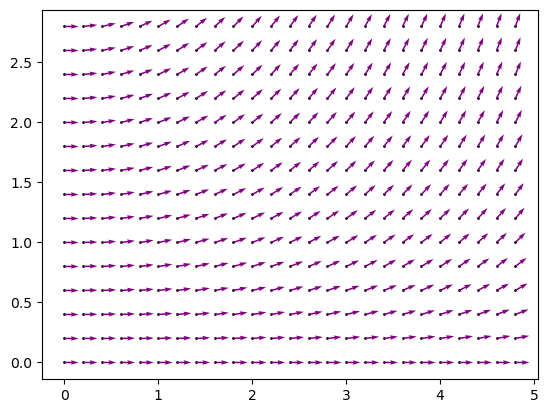

In [19]:
import numpy as np
import matplotlib.pyplot as plt


def campo(f, xargs, yargs ):
   """
   PROPÓSITO: Grafica un campo de direcciones de la ecuación diferencial ordinaria (EDO) dy/dx = f(x,y), donde y = y(x). La fucnión f(x,y) se representa en el parámetro *f*. El campo se grafica en un rango =[star, stop, step] para cada variable que viene representado por los parámetros *xargs* e *yargs*.
   PRECONDICIONES: *f* debe ser continua.
   PARÁMETROS:
      - f. Función. La función que representa la EDO.
      - xargs. Lista. Una lista de flotantes [star, stop, step].
      - yargs. Lista. Una lista de flotantes [star, stop, step].
   """
   xstar, xstop, xstep = xargs
   ystar, ystop, ystep = yargs
      
   x = np.arange(xstar, xstop, xstep)
   y = np.arange(ystar, ystop, ystep)
   X, Y = np.meshgrid(x, y)


   
   dy = f(X, Y)
   dx = np.ones(dy.shape)

   # Normalizamos

   dyu = dy/(np.sqrt(dy**2 + dx**2))
   dxu = dx/(np.sqrt(dy**2 + dx**2))

   fig, ax = plt.subplots()
   ax.scatter(X,Y,color='k', s =1) 
   # ax.grid(True, linestyle='--')
   ax.quiver(X,Y,dxu,dyu, color='purple')
   plt.show()

campo(lambda x, y: 0.2*x*y,[0, 5, 0.2], [0, 3, 0.2] )



## 2. Euler

In [ ]:
def Euler(f, h, xargs, y0):
   """
   PROPÓSITO: Aplica el método de Euler a la ecuación diferencial ordinaria (EDO) dy/dx = f(x,y), donde y = y(x) con paso *h* y valor inicial *y0*. La fucnión f(x,y) se representa en el parámetro *f*. El método se ejecuta en el rango inducido por la variable independiente x correspondiente al parámetro *xargs*.
   PRECONDICIONES: *f* debe ser continua.
   PARÁMETROS:
      - f. Función. La función que representa la EDO.
      - h. Flotante. El paso del método.
      - xargs. Lista. Una lista de flotantes [star, stop].
      - y0. Flotante. El valor que toma y en el comienzo del rango de x.
   """
   star, stop = xargs
   x = np.arange(star , stop, h)
   y = []
   for x0 in x:
      y0 = y0 + h*f(x0, y0)
      y.append(y0)
   return x, y

from math import sqrt
Euler(lambda x, y: 0.1*sqrt(y) + 0.4*x**2, 0.1, [2, 2.6], 4)


(array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6]),
 [np.float64(4.18),
  np.float64(4.376845048300261),
  np.float64(4.591365959007733),
  np.float64(4.824393431931547),
  np.float64(5.076757933819666),
  np.float64(5.349289595839632),
  np.float64(5.642818127128582)])

## 3. Variantes de Euler

### A partir de Euler se pueden hacer variante: que devuelva un Data Frame, para mejor visualización. Que grafique. Etc.

In [5]:
import pandas as pd

def Euler_pandas(f, h, xargs, y0):
   """
   PROPÓSITO: Aplica el método de Euler a la ecuación diferencial ordinaria (EDO) dy/dx = f(y,x) y devuelve un df con columnas x e y, donde y = y(x) con paso *h* y valor inicial *y0*. La fucnión f(y,x) se representa en el parámetro *f*. El método se ejecuta en el rango inducido por la variable independiente x correspondiente al parámetro *xargs*.
   PRECONDICIONES: *f* debe ser continua.
   PARÁMETROS:
      - f. Función. La función que representa la EDO.
      - h. Flotante. El paso del método.
      - xargs. Lista. Una lista de flotantes [star, stop].
      - y0. Flotante. El valor que toma y en el comienzo del rango de x.
   """
   star, stop = xargs
   x = np.arange(star , stop, h)
   y = []
   for x0 in x:
      y0 = y0 + h*f(x0, y0)
      y.append(y0)
   return pd.DataFrame({'x': x, 'y': y})

Euler_pandas(lambda x, y: 0.1*sqrt(y) + 0.4*x**2, 0.1, [2, 2.6], 4)

,x,y
0,2.0,4.180000
1,2.1,4.376845
2,2.2,4.591366
3,2.3,4.824393
4,2.4,5.076758
5,2.5,5.349290
6,2.6,5.642818


In [18]:
def f(x, y): 
   return 0.1*sqrt(y) + 0.4*x**2

df = Euler_pandas(f, 0.1, [2, 2.6], 4)

a, b = df.columns

print(a, b)
print(type(a))

x y
<class 'str'>


<Axes: xlabel='x', ylabel='y'>

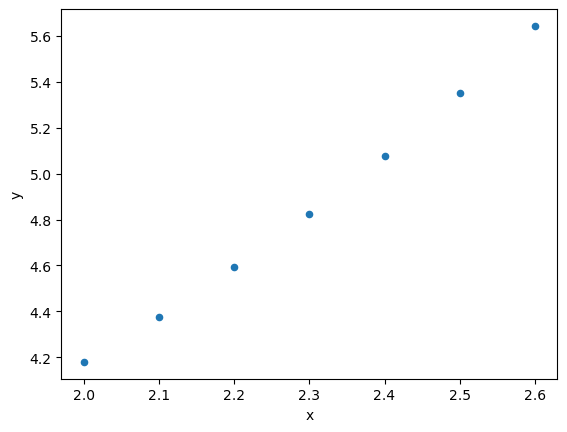

In [17]:
def Euler_plot(f, h, xargs, y0):
   df = Euler_pandas(f, h, xargs, y0)
   a, b = df.columns
   ax = df.plot.scatter(x = a, y = b)
   return ax

Euler_plot(lambda x, y: 0.1*sqrt(y) + 0.4*x**2, 0.1, [2, 2.6], 4)

